### Function to graphically compare two groups of numbers using vertical bars


In [1]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# High-resolution plot outputs for Retina notebooks
%config InlineBackend.figure_format = 'retina'
!python --version

Python 3.9.12


In [2]:
def show_graph_diff(val1,
                    val2,
                    err1=None,          # optional list of errors 
                    err2=None,          # optional list of errors
                    label_groups=None,  # optional tuple of 2 names for groups
                    label_metrics=None  # list of text labels
                   ):
    """
    # graph to compare two groups of metrics (Test vs Control)
    # accepts two lists of values and optionally two lists of errors
    # (all lists are of the same length)
    # also optionally accepts 
    #   list of names of two groups (default is ["Test","Control"])
    #   list of names of metrics
    # plots them as side-by-side comparison (vertical bars)
    """
    # ---------------------------------------------------
    import matplotlib.pyplot as plt
    # High-resolution plot outputs for Retina notebooks
    %config InlineBackend.figure_format = 'retina'
    # ---------------------------------------------------
    val1 = list(val1)
    val2 = list(val2)
    N = len(val1)
    # ---------------------------------------------------
    if label_groups == None:
        label_groups = ["Test","Control"]
    else:
        label_groups = list(label_groups)
    # ---------------------------------------------------
    if label_metrics == None:
        label_metrics = ['Metrics %02d'%x for x in range(N)]
    else:
        if type(label_metrics) == str:
            label_metrics = [label_metrics]
        label_metrics = list(label_metrics)
    # ---------------------------------------------------
    if err1 == None:
        err1 = [0 for x in range(N)]
    else:
        err1 = list(err1)
    # ---------------------------------------------------
    if err2 == None:
        err2 = [0 for x in range(N)]    
    else:
        err2 = list(err2)
    # ---------------------------------------------------
    if N == 1: # bars are two wide, fix by adding one more zero element
        val1 = val1 + [0]
        val2 = val2 + [0]
        err1 = err1 + [0]
        err2 = err2 + [0]
        label_metrics = label_metrics + [' ']
        N = 2
    # ---------------------------------------------------
    # set size of the graph
    plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35        # the width of the bars
    if N <=3:
        width = 0.15
        
        
    fig, ax = plt.subplots()
    # ---------------------------------------------------
    rects1 = ax.bar(ind,         val1, width, color='r', yerr=err1)
    rects2 = ax.bar(ind + width, val2, width, color='y', yerr=err2)
    bottom, top = plt.ylim()  # return the current ylim
    plt.ylim((bottom, int(top*1.1)))
    # ---------------------------------------------------
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percent')
    ax.set_title('Percent Comparison')
    ax.set_xticks(ind + width / 2)

    ax.set_xticklabels(label_metrics, 
                       rotation=15,
                       ha='right')

    ax.legend((rects1[0], rects2[0]), label_groups)
    # ---------------------------------------------------
    def autolabel(rects):
        """ add height number above each bar """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
            
    autolabel(rects1)
    autolabel(rects2)
    # ---------------------------------------------------
    plt.show();

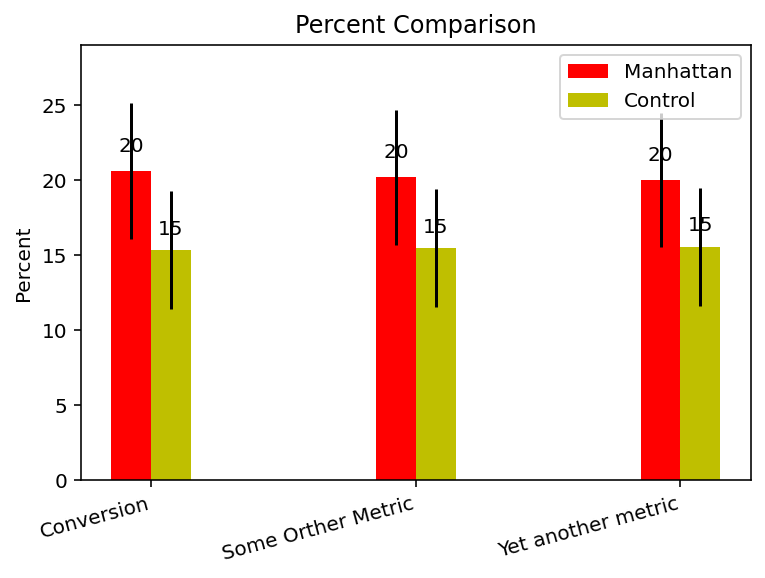

In [3]:
# create sample data
val1 = np.random.rand(3)+20
val2 = np.random.rand(3)+15
err1 = [np.sqrt(x) for x in val1]
err2 = [np.sqrt(x) for x in val2]
label_groups = ("Manhattan","Control")
label_metrics = ("Conversion", "Some Orther Metric", "Yet another metric")
show_graph_diff(val1,val2,err1,err2,
               label_groups=label_groups,
               label_metrics=label_metrics)

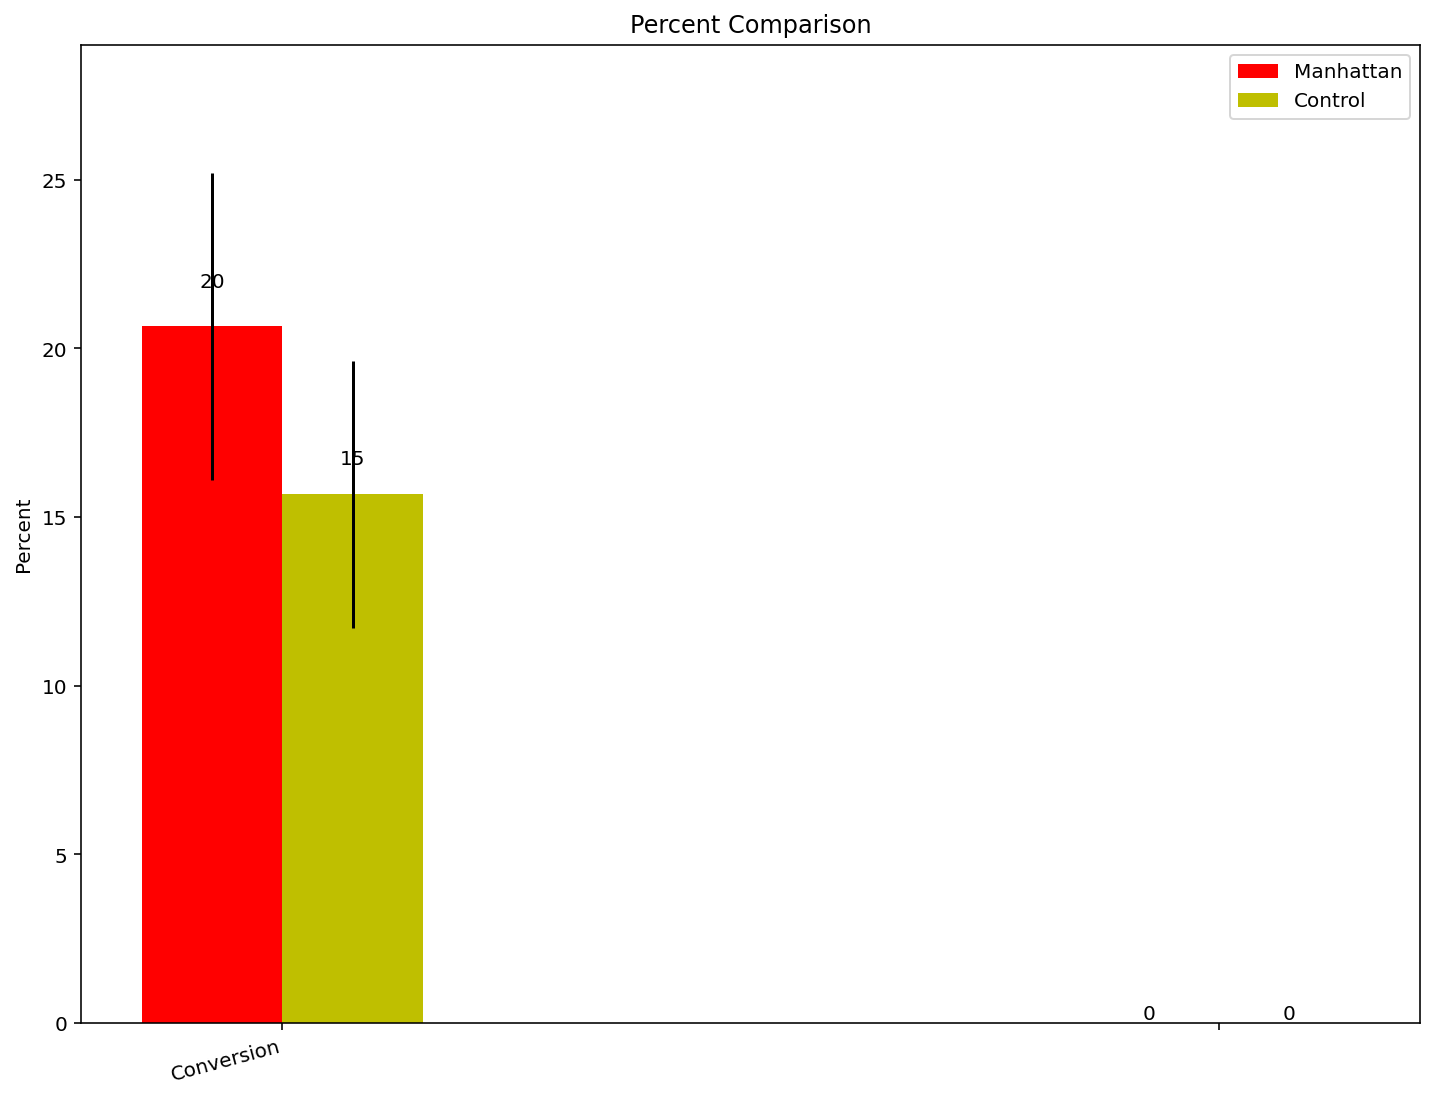

In [4]:
# create sample data
val1 = np.random.rand(1)+20
val2 = np.random.rand(1)+15
err1 = [np.sqrt(x) for x in val1]
err2 = [np.sqrt(x) for x in val2]
label_groups = ["Manhattan","Control"]
label_metrics = ("Conversion")
show_graph_diff(val1,val2,err1,err2,
               label_groups=label_groups,
               label_metrics=label_metrics)

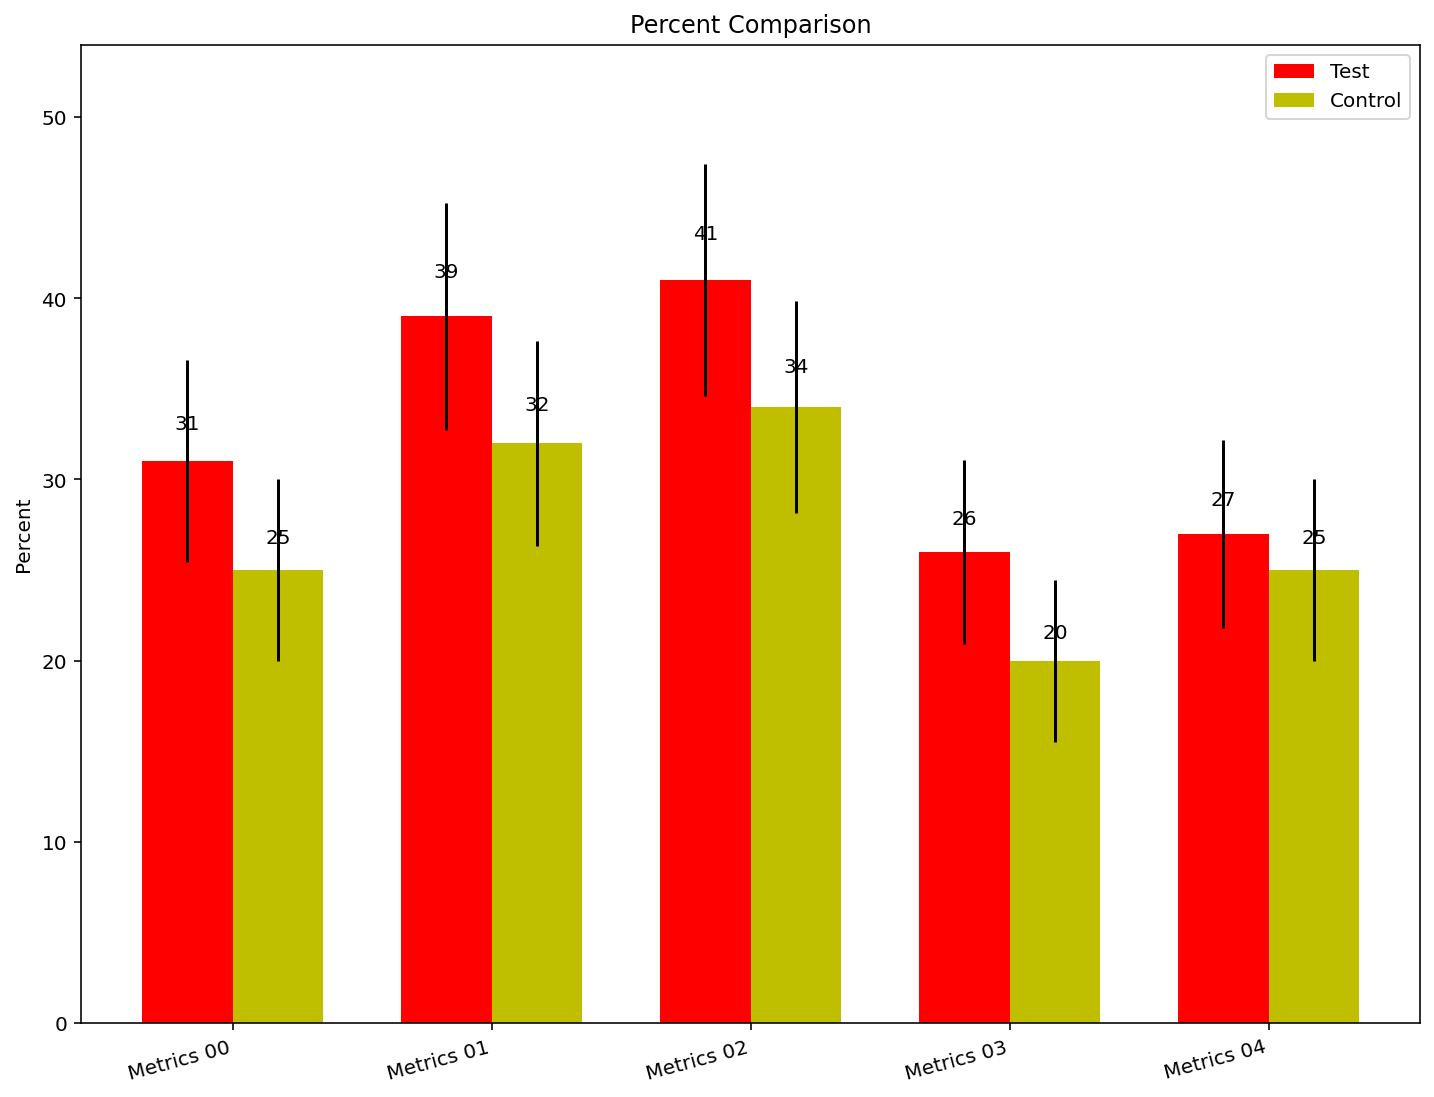

In [5]:
# create sample data
val1 = (31, 39, 41, 26, 27) 
val2 = (25, 32, 34, 20, 25) 
err1 = [np.sqrt(x) for x in val1]
err2 = [np.sqrt(x) for x in val2]
show_graph_diff(val1,val2,err1,err2)

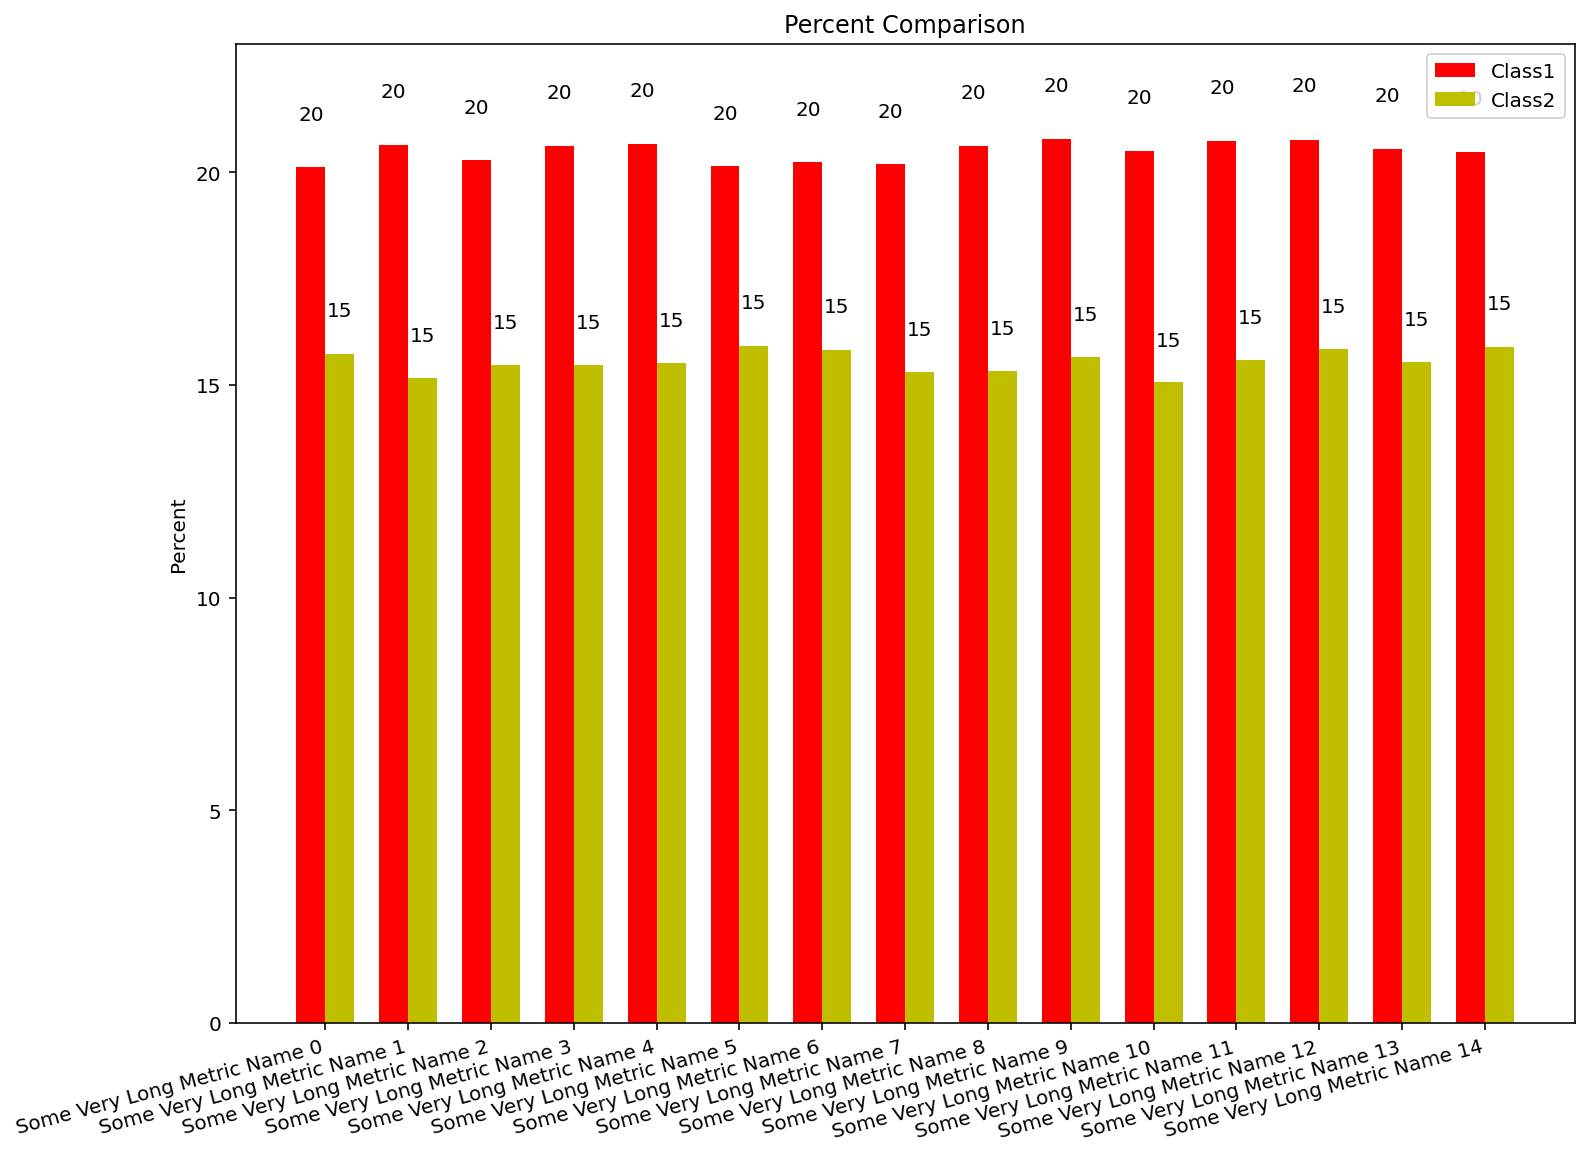

In [6]:
# create sample data
val1 = np.random.rand(15)+20
val2 = np.random.rand(15)+15
err1 = [0 for x in val1]
err2 = [0 for x in val2]
labels = ['Some Very Long Metric Name %d' % x for x in range(len(val1))]
show_graph_diff(val1,val2,
                label_groups  = ("Class1","Class2"),
                label_metrics = labels)